In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
#export
from exp.nb_00 import *
import operator
 
def test(a,b,cmp,cname=None):
    if cname is None: cname = cmp.__name__
    assert cmp(a,b), f"{cname}:\n{a}\n{b}"

def test_eq(a,b): test(TEST,'Test',operator.eq, '==')

In [3]:
test_eq(TEST,'Test')

In [4]:
#export
from pathlib import Path
from IPython.core.debugger import set_trace
from fastai import datasets
import pickle, gzip, math, torch, matplotlib as mpl
import matplotlib.pyplot as plt
from torch import tensor
MNIST_URL='http://deeplearning.net/data/mnist/mnist.pkl'

In [6]:
path = datasets.download_data(MNIST_URL, ext='.gz');path

PosixPath('/Users/a.h.sharma/.fastai/data/mnist.pkl.gz')

In [7]:
with gzip.open(path, 'rb') as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

In [8]:
x_train, y_train, x_valid, y_valid = map(tensor, (x_train, y_train, x_valid, y_valid))
n, c = x_train.shape
x_train, x_train.shape, y_train, y_train.shape, y_train.min(), y_train.max()

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 torch.Size([50000, 784]),
 tensor([5, 0, 4,  ..., 8, 4, 8]),
 torch.Size([50000]),
 tensor(0),
 tensor(9))

In [9]:
assert n==y_train.shape[0]
test_eq(c, 28*28)
test_eq(y_train.min(), 0)
test_eq(y_train.max(), 0)

In [10]:
mpl.rcParams['image.cmap']='gray'

In [11]:
img = x_train[0]

In [12]:
img.view(28,28).type()

'torch.FloatTensor'

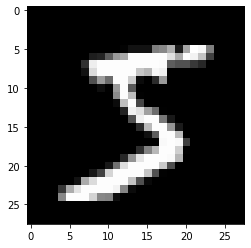

In [13]:
plt.imshow(img.view(28,28));

In [14]:
weights = torch.randn(784, 10)

In [15]:
bias = torch.zeros(10)

In [16]:
weights.shape, bias.shape

(torch.Size([784, 10]), torch.Size([10]))

In [17]:
def matmul(a, b):
    ar, ac = a.shape
    br, bc = b.shape
    assert ac==br
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            for k in range(ac):
                c[i,j] += a[i,k] * b[k,j]
    return c

In [18]:
m1 = x_valid[:5]
m2 = weights

In [19]:
m1.shape, m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [20]:
%time t1 = matmul(m1, m2)

CPU times: user 1.38 s, sys: 38.9 ms, total: 1.42 s
Wall time: 1.53 s


In [21]:
t1.shape

torch.Size([5, 10])

In [22]:
len(x_train)

50000

In [23]:
a = tensor([10., 6., -4])
b = tensor([2., 8, 7])
a,b

(tensor([10.,  6., -4.]), tensor([2., 8., 7.]))

In [24]:
a + b

tensor([12., 14.,  3.])

In [25]:
(a < b).float().mean()

tensor(0.6667)

In [26]:
m = tensor([[1., 2, 3], [4, 5, 6], [7, 8, 9]]);
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

Frobenius norm:

$$\| A \|_F = \left( \sum_{i,j=1}^n | a_{ij} |^2 \right)^{1/2}$$

In [27]:
(m*m).sum().sqrt()

tensor(16.8819)

In [28]:
def matmul(a,b):
    ar, ac = a.shape
    br, bc = b.shape
    assert ac == br
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            c[i, j] = (a[i,:] * b[:,j]).sum()
    return c       

In [29]:
%timeit -n 10 _ = matmul(m1, m2)

The slowest run took 4.84 times longer than the fastest. This could mean that an intermediate result is being cached.
4.54 ms ± 2.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [30]:
# export
def near(a, b): return torch.allclose(a, b, rtol=1e-3, atol=1e-5)
def test_near(a,b): return test(a, b, near)

In [31]:
test_near(t1, matmul(m1, m2))

In [32]:
a = tensor([10., 6., -4])
a

tensor([10.,  6., -4.])

In [33]:
a > 0

tensor([1, 1, 0], dtype=torch.uint8)

In [34]:
a + 1

tensor([11.,  7., -3.])

In [35]:
m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [36]:
2 * m

tensor([[ 2.,  4.,  6.],
        [ 8., 10., 12.],
        [14., 16., 18.]])

In [37]:
c = tensor([10., 20, 30]); c

tensor([10., 20., 30.])

In [38]:
m.shape, c.shape

(torch.Size([3, 3]), torch.Size([3]))

In [39]:
m + c

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

In [40]:
c + m

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

In [41]:
t = c.expand_as(m)

In [42]:
t

tensor([[10., 20., 30.],
        [10., 20., 30.],
        [10., 20., 30.]])

In [43]:
m + t

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

In [44]:
t.storage()

 10.0
 20.0
 30.0
[torch.FloatStorage of size 3]

In [45]:
t.stride(), t.shape

((0, 1), torch.Size([3, 3]))

In [46]:
c.unsqueeze(0)

tensor([[10., 20., 30.]])

In [47]:
c.unsqueeze(1)

tensor([[10.],
        [20.],
        [30.]])

In [48]:
c.shape, c.unsqueeze(0).shape, c.unsqueeze(1).shape

(torch.Size([3]), torch.Size([1, 3]), torch.Size([3, 1]))

In [49]:
c.shape, c[None].shape, c[:, None].shape

(torch.Size([3]), torch.Size([1, 3]), torch.Size([3, 1]))

In [50]:
c[None].shape, c[..., None].shape

(torch.Size([1, 3]), torch.Size([3, 1]))

In [51]:
c[...,None].expand_as(m)

tensor([[10., 10., 10.],
        [20., 20., 20.],
        [30., 30., 30.]])

In [52]:
m + c[:, None]

tensor([[11., 12., 13.],
        [24., 25., 26.],
        [37., 38., 39.]])

In [53]:
def matmul(a, b):
    ar, ac = a.shape
    br, bc = b.shape
    assert ac == br
    c = torch.zeros(ar, bc)
    for i in range(ar):
        c[i] = (a[i,].unsqueeze(-1) * b).sum(dim=0)
    return c

In [54]:
%timeit -n 10 _ = matmul(m1, m2)

194 µs ± 23.6 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [55]:
820000/253

3241.106719367589

In [56]:
test_near(t1, matmul(m1, m2))

In [57]:
c[None, :]

tensor([[10., 20., 30.]])

In [58]:
c[None,:].shape

torch.Size([1, 3])

In [59]:
c[None]

tensor([[10., 20., 30.]])

In [60]:
c[None].shape

torch.Size([1, 3])

In [61]:
c[None, :] * c[:, None]

tensor([[100., 200., 300.],
        [200., 400., 600.],
        [300., 600., 900.]])

In [62]:
c[None, :] > c[:, None]

tensor([[0, 1, 1],
        [0, 0, 1],
        [0, 0, 0]], dtype=torch.uint8)

In [63]:
def matmul(a, b): return torch.einsum('ik,kj->ij', a, b)

In [64]:
%timeit -n 10 _ = matmul(m1, m2)

53.7 µs ± 9.4 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [65]:
820000/62.8

13057.324840764331

In [66]:
test_near(t1, matmul(m1, m2))

In [67]:
%timeit -n 10 _ = m1.matmul(m2)

17.5 µs ± 4.18 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [68]:
820000/15.6

52564.10256410256

In [69]:
t2= m1@m2

In [70]:
test_near(t1, t2)

In [71]:
m1.shape,m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [74]:
!python notebook2script.py 01_matmul.ipynb

Converted 01_matmul.ipynb to exp/nb_01.py
